<a href="https://colab.research.google.com/github/SakshiPatial1234/ANALYSIS-OF-BOSTON-HOUSING-DATASET-USING-APACHE-SPARK/blob/main/COMPARISION_OF_THREE_MODELS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install mysql-connector-python


pip install mysql-connector-python==8.0.17


pip uninstall mysql-connector-python

import mysql.connector
mysql.connector.connect(host='localhost',database='mysql',user='root',password='your pass')


<mysql.connector.connection.MySQLConnection object at 0x0187AE50>

**REGRESSION**

In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator
eval = RegressionEvaluator(labelCol="medv", predictionCol="prediction", metricName="rmse")

# Root Mean Square Error
rmse = eval.evaluate(pred.predictions)
print("RMSE: %.3f" % rmse)

# Mean Square Error
mse = eval.evaluate(pred.predictions, {eval.metricName: "mse"})
print("MSE: %.3f" % mse)

# Mean Absolute Error
mae = eval.evaluate(pred.predictions, {eval.metricName: "mae"})
print("MAE: %.3f" % mae)

# r2 - coefficient of determination
r2 = eval.evaluate(pred.predictions, {eval.metricName: "r2"})
print("r2: %.3f" %r2)

RMSE: 5.617
MSE: 31.546
MAE: 3.618
r2: 0.654


**RANDOM FOREST TREE**

In [ ]:
# Model evaluation
from pyspark.mllib.evaluation import BinaryClassificationMetrics

start_time = time()

metrics = BinaryClassificationMetrics(labels_and_predictions)
print("Area under Precision/Recall (PR) curve: %.f" % (metrics.areaUnderPR * 100))
print("Area under Receiver Operating Characteristic (ROC) curve: %.3f" % (metrics.areaUnderROC * 100))

end_time = time()
elapsed_time = end_time - start_time
print("Time to evaluate model: %.3f seconds" % elapsed_time)

Area under Precision/Recall (PR) curve: 79
Area under Receiver Operating Characteristic (ROC) curve: 91.267
Time to evaluate model: 11.056 seconds


**XGBOOST**

In [ ]:
#Print best performing parameters and their RMSE scores
print('Best parameters found: ', grid_mse.best_params_)
print('Lowerst RMSE found: ', np.sqrt(np.sqrt(np.abs(grid_mse.best_score_))))

Best parameters found:  {'learning rate': 0.01, 'n_estimators': 200, 'subsample': 0.9}
Lowerst RMSE found:  2.0897401278222953


**VISUALISATION**

**LINEAR REGRESSION**

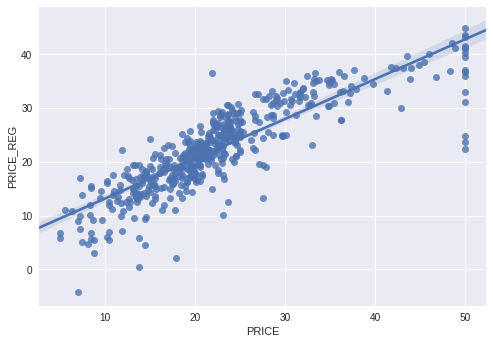

In [ ]:
import seaborn as sns; sns.set(color_codes=True)
ax = sns.regplot(x="PRICE", y="PRICE_REG", data=boston_df[['PRICE','PRICE_REG']])

**RANDOM FOREST**

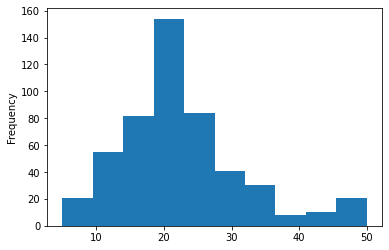

In [ ]:
data['PRICE'].plot(kind = 'hist')

**XGBOOST**

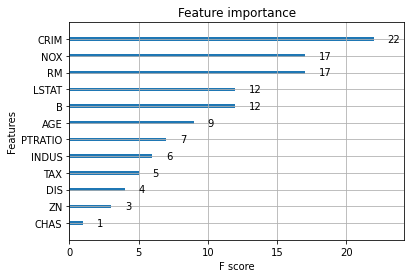

In [ ]:
xgb.plot_importance(xg_reg)

**COMPARISION OF THE ACCURACY BETWEEN THE THREE MODELS**

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the n

XGBoost: 0.773428 (0.053375)
Random Forest: 0.773462 (0.051592)
Linear Regression: 0.726555 (0.061821)


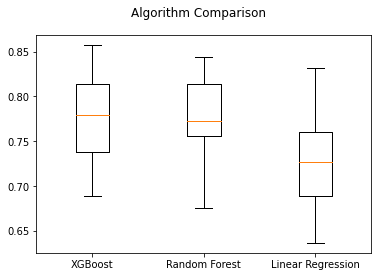

In [ ]:
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# load dataset
url = "/BostonHousing.csv"
names = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']
dataframe = pandas.read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('XGBoost', XGBoost()))
models.append(('Random Forest', RandomForest()))
models.append(('Linear Regression', LinearRegression()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

From comparing the Models, <br>
XGBoost shows greater accuracy of 85.36%<br>
RandomForest shows second greatest accuract of 77.34%<br>
linear Regression shows lesser accuracy of 72.65%